In [270]:
## Manual changes - Renamed ROUNDS to rounds in Wimbeldon women's file
#Renamed ST1.1 for Wimbeldon women's file as there were 2 columns with the same name
#Renamed ST2.1 for US women's file as there were 2 columns with the same name
#Figure out how to do this in an automated manner

In [271]:
# Player 1 Name of Player 1 
# Player 2 Name of Player 2 
# Result Result of the match (0/1) - Referenced on Player 1 is Result = 1 if Player 1 wins (FNL.1>FNL.2) 
# FSP.1 First Serve Percentage for player 1 (Real Number) 
# FSW.1 First Serve Won by player 1 (Real Number) 
# SSP.1 Second Serve Percentage for player 1 (Real Number) 
# SSW.1 Second Serve Won by player 1 (Real Number) 
# ACE.1 Aces won by player 1 (Numeric-Integer) 
# DBF.1 Double Faults committed by player 1 (Numeric-Integer) 
# WNR.1 Winners earned by player 1 (Numeric) 
# UFE.1 Unforced Errors committed by player 1 (Numeric) 
# BPC.1 Break Points Created by player 1 (Numeric) 
# BPW.1 Break Points Won by player 1 (Numeric) 
# NPA.1 Net Points Attempted by player 1 (Numeric) 
# NPW.1 Net Points Won by player 1 (Numeric) 
# TPW.1 Total Points Won by player 1 (Numeric) 
# ST1.1 Set 1 result for Player 1 (Numeric-Integer) 
# ST2.1 Set 2 Result for Player 1 (Numeric-Integer) 
# ST3.1 Set 3 Result for Player 1 (Numeric-Integer) 
# ST4.1 Set 4 Result for Player 1 (Numeric-Integer) 
# ST5.1 Set 5 Result for Player 1 (Numeric-Integer) 
# FNL.1 Final Number of Games Won by Player 1 (Numeric-Integer) 
# FSP.2 First Serve Percentage for player 2 (Real Number) 
# FSW.2 First Serve Won by player 2 (Real Number) 
# SSP.2 Second Serve Percentage for player 2 (Real Number) 
# SSW.2 Second Serve Won by player 2 (Real Number) 
# ACE.2 Aces won by player 2 (Numeric-Integer) 
# DBF.2 Double Faults committed by player 2 (Numeric-Integer) 
# WNR.2 Winners earned by player 2 (Numeric) 
# UFE.2 Unforced Errors committed by player 2 (Numeric) 
# BPC.2 Break Points Created by player 2 (Numeric) 
# BPW.2 Break Points Won by player 2 (Numeric) 
# NPA.2 Net Points Attempted by player 2 (Numeric) 
# NPW.2 Net Points Won by player 2 (Numeric) 
# TPW.2 Total Points Won by player 2 (Numeric) 
# ST1.2 Set 1 result for Player 2 (Numeric-Integer) 
# ST2.2 Set 2 Result for Player 2 (Numeric-Integer) 
# ST3.2 Set 3 Result for Player 2 (Numeric-Integer) 
# ST4.2 Set 4 Result for Player 2 (Numeric-Integer) 
# ST5.2 Set 5 Result for Player 2 (Numeric-Integer) 
# FNL.2 Final Number of Games Won by Player 2 (Numeric-Integer) 
# Round Round of the tournament at which game is played (Numeric-Integer) 

# ACE.1         22
# ACE.2         22
# BPC.1          0
# BPC.2          0
# BPW.1          0
# BPW.2          0
# DBF.1          6
# DBF.2          6
# FNL.1        372
# FNL.2        372
# FNL1         560
# FNL2         560
# FSP.1          0
# FSP.2          0
# FSW.1          0
# FSW.2          0
# NPA.1         83
# NPA.2         83
# NPW.1         82
# NPW.2         82
# Result         0
# Round          0
# SSP.1          0
# SSP.2          0
# SSW.1          0
# SSW.2          0
# Sex            0
# TPW.1        312
# TPW.2        312
# UFE.1        125
# UFE.2        125
# WNR.1        125
# WNR.2        125
# slam_code      0
# ST1            0
# ST2            0
# ST3            0
# ST4            0
# ST5            0
# dtype: int64


# IMPORT

In [272]:
import os
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

import sklearn.neighbors as neighbors
from sklearn.decomposition import TruncatedSVD
from sklearn import manifold
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [273]:
# Code - aus:1 french open:2 wimbeldon:3 and Us open:4
# 1 for women and 2 for Men
# Result : 1 for player winning and 0 for him/her losing
aus_men = pd.read_csv("../data/AusOpen-men-2013.csv")
aus_women = pd.read_csv("../data/AusOpen-women-2013.csv")
aus_men['slam_code'] = 1
aus_women['slam_code'] = 1
aus_women['Sex'] = 1
aus_men['Sex'] = 2


fre_men = pd.read_csv("../data/FrenchOpen-men-2013.csv")
fre_women = pd.read_csv("../data/FrenchOpen-women-2013.csv")
fre_men['slam_code'] = 2
fre_women['slam_code'] = 2
fre_women['Sex'] = 1
fre_men['Sex'] = 2

wim_men = pd.read_csv("../data/Wimbledon-men-2013.csv")
wim_women = pd.read_csv("../data/Wimbledon-women-2013.csv")
wim_men['slam_code'] = 3
wim_women['slam_code'] = 3
wim_women['Sex'] = 1
wim_men['Sex'] = 2

us_men = pd.read_csv("../data/USOpen-men-2013.csv")
us_women = pd.read_csv("../data/USOpen-women-2013.csv")
us_men['slam_code'] = 4
us_women['slam_code'] = 4
us_women['Sex'] = 1
us_men['Sex'] = 2

# CLEANSING

In [274]:
aus_men = aus_men.rename(columns={'FNL1': 'FNL.1', 'FNL2': 'FNL.2'})
aus_women = aus_women.rename(columns={'FNL1': 'FNL.1', 'FNL2': 'FNL.2'})

In [275]:
us_men = us_men.rename(columns={'FNL1': 'FNL.1', 'FNL2': 'FNL.2'})
us_women = us_women.rename(columns={'Player 1': 'Player1', 'Player 2': 'Player2'})

In [276]:
frames = [aus_men, fre_men, wim_men, us_men, aus_women, fre_women, wim_women, us_women]
tennis_merge = pd.concat(frames)

In [277]:
tennis_merge.columns[tennis_merge.isnull().any()]

Index(['FNL.1', 'FNL.2', 'ACE.1', 'DBF.1', 'WNR.1', 'UFE.1', 'BPC.1', 'BPW.1',
       'NPA.1', 'NPW.1', 'TPW.1', 'ST1.1', 'ST2.1', 'ST3.1', 'ST4.1', 'ST5.1',
       'ACE.2', 'DBF.2', 'WNR.2', 'UFE.2', 'BPC.2', 'BPW.2', 'NPA.2', 'NPW.2',
       'TPW.2', 'ST1.2', 'ST2.2', 'ST3.2', 'ST4.2', 'ST5.2'],
      dtype='object')

In [278]:
tennis_merge.head()

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,slam_code,Sex
0,Lukas Lacko,Novak Djokovic,1,0,0.0,3.0,61,35,39,18,...,8.0,9.0,101.0,6.0,7.0,6.0,NaN,NaN,1,2
1,Leonardo Mayer,Albert Montanes,1,1,3.0,0.0,61,31,39,13,...,NaN,NaN,42.0,1.0,3.0,1.0,NaN,NaN,1,2
2,Marcos Baghdatis,Denis Istomin,1,0,0.0,3.0,52,53,48,20,...,12.0,16.0,126.0,6.0,7.0,6.0,NaN,NaN,1,2
3,Dmitry Tursunov,Michael Russell,1,1,3.0,0.0,53,39,47,24,...,NaN,NaN,79.0,2.0,2.0,3.0,NaN,NaN,1,2
4,Juan Monaco,Ernests Gulbis,1,0,1.0,3.0,76,63,24,12,...,16.0,28.0,127.0,1.0,6.0,7.0,6.0,NaN,1,2


In [279]:
#Source:https://stackoverflow.com/a/39237712

tennis_merge = tennis_merge.reindex(
    columns = (['Player1','Player2'] + 
               list([a for a in tennis_merge.columns if a not in ('Player1','Player2')]
                   ) 
              )
)

In [280]:
#Abandoned games men
tennis_merge[(tennis_merge['ST3.1'].isnull()) & (tennis_merge['Sex'] == 2)]

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,slam_code,Sex
7,Fabio Fognini,Alex Bogomolov Jr.,1,1,2.0,0.0,47,18,53,15,...,8.0,12.0,61.0,3.0,2.0,NaN,NaN,NaN,1,2
15,Stanislas Wawrinka,Andrey Golubev,1,1,2.0,0.0,63,20,37,6,...,6.0,12.0,37.0,4.0,1.0,NaN,NaN,NaN,1,2
24,Guillermo Garcia-Lopez,Tommy Haas,1,1,2.0,0.0,58,27,42,11,...,10.0,10.0,55.0,5.0,2.0,NaN,NaN,NaN,1,2
40,Martin Klizan,John Isner,1,1,2.0,0.0,54,25,46,21,...,5.0,10.0,52.0,2.0,6.0,NaN,NaN,NaN,1,2
63,Rafael Nadal,Bernard Tomic,1,1,1.0,0.0,62,14,38,6,...,3.0,5.0,24.0,4.0,NaN,NaN,NaN,NaN,1,2
59,Alejandro Falla,Grigor Dimitrov,1,0,0.0,2.0,54,10,46,7,...,6.0,7.0,48.0,6.0,1.0,NaN,NaN,NaN,2,2
91,Dmitry Tursunov,Victor Hanescu,2,0,0.0,2.0,59,31,41,9,...,5.0,6.0,66.0,6.0,6.0,NaN,NaN,NaN,2,2
65,Guillaume Rufin,Dmitry Tursunov,1,0,0.0,2.0,43,14,57,12,...,NaN,NaN,51.0,7.0,1.0,NaN,NaN,NaN,4,2


In [281]:
#Abandoned games women
tennis_merge[(tennis_merge['ST2.1'].isnull()) & (tennis_merge['Sex'] == 1)]

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,slam_code,Sex
44,Alize Cornet,Polona Hercog,1,0,NaN,NaN,75,3,25,1,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1,1
76,Ashleigh Barty,Maria Kirilenko,2,0,0.0,1.0,61,6,39,4,...,5.0,6.0,18.0,3.0,NaN,NaN,NaN,NaN,2,1
77,Kaia Kanepi,Stefanie Voegele,2,1,1.0,0.0,71,20,29,5,...,4.0,6.0,39.0,5.0,NaN,NaN,NaN,NaN,2,1


In [282]:
## Removing abandoned games
tennis_merge = tennis_merge[-((tennis_merge['ST3.1'].isnull()) & (tennis_merge['Sex'] == 2))] #For men

tennis_merge = tennis_merge[-((tennis_merge['ST2.1'].isnull()) & (tennis_merge['Sex'] == 1))] #For women

In [283]:
## Feature engineering1: Find difference between games won in sets as this would indicate who won the set
# If positive: Player 1 wins the set Else Player 2
# The value is NaN if the set did not occur, in which case we set it to 0(0 can never occur otherwise)
tennis_merge['ST1'] = tennis_merge['ST1.1'] - tennis_merge['ST1.2']
tennis_merge['ST2'] = tennis_merge['ST2.1'] - tennis_merge['ST2.2']
tennis_merge['ST3'] = tennis_merge['ST3.1'] - tennis_merge['ST3.2']
tennis_merge['ST4'] = tennis_merge['ST4.1'] - tennis_merge['ST4.2']
tennis_merge['ST5'] = tennis_merge['ST5.1'] - tennis_merge['ST5.2']


In [284]:
## Replace NaN with 0s
tennis_merge['ST3'].fillna(0, inplace=True)
tennis_merge['ST4'].fillna(0, inplace=True)
tennis_merge['ST5'].fillna(0, inplace=True)

In [285]:
tennis_merge.columns

Index(['Player1', 'Player2', 'Round', 'Result', 'FNL.1', 'FNL.2', 'FSP.1',
       'FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1', 'UFE.1', 'BPC.1',
       'BPW.1', 'NPA.1', 'NPW.1', 'TPW.1', 'ST1.1', 'ST2.1', 'ST3.1', 'ST4.1',
       'ST5.1', 'FSP.2', 'FSW.2', 'SSP.2', 'SSW.2', 'ACE.2', 'DBF.2', 'WNR.2',
       'UFE.2', 'BPC.2', 'BPW.2', 'NPA.2', 'NPW.2', 'TPW.2', 'ST1.2', 'ST2.2',
       'ST3.2', 'ST4.2', 'ST5.2', 'slam_code', 'Sex', 'ST1', 'ST2', 'ST3',
       'ST4', 'ST5'],
      dtype='object')

In [286]:
#removing names of players as we aren't considering ranking here
# removing set info cause we have created another column
# removing Total points won cause there are too many missing values
rem_cols = ['Player1','Player2','TPW.1','TPW.2','FNL.1','FNL.2',
            'ST1.1','ST2.1','ST3.1','ST4.1','ST5.1',
            'ST1.2','ST2.2','ST3.2','ST4.2','ST5.2','ST1','ST2','ST3','ST4','ST5']

tennis_feat = tennis_merge.drop(rem_cols,axis  = 1,inplace = False) #removes columns

tennis_feat = shuffle(tennis_feat) #shuffles

#convert numeric to categorical
col_names = ['Round','slam_code','Sex','Result']
for col in col_names:
    tennis_feat[col] = tennis_feat[col].astype('category',copy=False)
    
#Train-test split. 30% for test
train,test = train_test_split(tennis_feat,test_size = 0.3)

In [287]:
tennis_feat[tennis_feat.columns[:]].isnull().sum().sort_values()

Round          0
BPW.2          0
BPC.2          0
SSW.2          0
SSP.2          0
FSW.2          0
FSP.2          0
slam_code      0
BPW.1          0
BPC.1          0
Sex            0
SSW.1          0
SSP.1          0
FSW.1          0
Result         0
FSP.1          0
DBF.2          6
DBF.1          6
ACE.1         22
ACE.2         22
NPW.2         82
NPW.1         82
NPA.2         83
NPA.1         83
WNR.2        125
UFE.1        125
UFE.2        125
WNR.1        125
dtype: int64

In [288]:
#convert numeric to categorical
col_names = ['Round','slam_code','Sex','Result']
for col in col_names:
    tennis_feat[col] = tennis_feat[col].astype('category',copy=False)
    


In [289]:
### Imputing mean values for men and women separately
## for columns - ACES, Net point won, Net points attempted, Winners hit and Unforced errors
## This is because this usually fluctates around the mean value for men's and women's tennis
print("Median for Winners player 1(MEN)",tennis_feat[tennis_feat["Sex"] == 2]["WNR.1"].median())
print("Median for Winners player 2(MEN)",tennis_feat[tennis_feat["Sex"] == 2]["WNR.2"].median())

print("Median for Ace player 1(WOMEN)",tennis_feat[tennis_feat["Sex"] == 1]["ACE.1"].median())
print("Median for Ace player 2(WOMEN)",tennis_feat[tennis_feat["Sex"] == 1]["ACE.2"].median())

print("Median for Net points attempted 1(WOMEN)",tennis_feat[tennis_feat["Sex"] == 1]["NPA.1"].median())
print("Median for Net points attempted 2(WOMEN)",tennis_feat[tennis_feat["Sex"] == 1]["NPA.2"].median())

print("Median for Net points attempted 1(MEN)",tennis_feat[tennis_feat["Sex"] == 2]["NPA.1"].median())
print("Median for Net points attempted 2(MEN)",tennis_feat[tennis_feat["Sex"] == 2]["NPA.2"].median())

print("Median for Net points won 1(WOMEN)",tennis_feat[tennis_feat["Sex"] == 1]["NPW.1"].median())
print("Median for Net points won 2(WOMEN)",tennis_feat[tennis_feat["Sex"] == 1]["NPW.2"].median())

print("Median for Net points Won 1(MEN)",tennis_feat[tennis_feat["Sex"] == 2]["NPW.1"].median())
print("Median for Net points Won 2(MEN)",tennis_feat[tennis_feat["Sex"] == 2]["NPW.2"].median())

Median for Winners player 1(MEN) 35.0
Median for Winners player 2(MEN) 36.0
Median for Ace player 1(WOMEN) 2.0
Median for Ace player 2(WOMEN) 2.0
Median for Net points attempted 1(WOMEN) 9.0
Median for Net points attempted 2(WOMEN) 9.0
Median for Net points attempted 1(MEN) 17.0
Median for Net points attempted 2(MEN) 18.0
Median for Net points won 1(WOMEN) 9.5
Median for Net points won 2(WOMEN) 9.0
Median for Net points Won 1(MEN) 22.0
Median for Net points Won 2(MEN) 22.0


In [290]:
#src: https://stackoverflow.com/a/21463854
tennis_feat["NPW.1"] = tennis_feat["NPW.1"].fillna(round(tennis_feat.groupby("Sex")["NPW.1"].transform("median"),2))
tennis_feat["NPW.2"] = tennis_feat["NPW.2"].fillna(round(tennis_feat.groupby("Sex")["NPW.2"].transform("median"),2))

tennis_feat["NPA.1"] = tennis_feat["NPA.1"].fillna(tennis_feat.groupby("Sex")["NPA.1"].transform("median"))
tennis_feat["NPA.2"] = tennis_feat["NPA.2"].fillna(tennis_feat.groupby("Sex")["NPA.2"].transform("median"))

tennis_feat["ACE.1"] = tennis_feat["ACE.1"].fillna(tennis_feat.groupby("Sex")["ACE.1"].transform("median"))
tennis_feat["ACE.2"] = tennis_feat["ACE.2"].fillna(tennis_feat.groupby("Sex")["ACE.2"].transform("median"))

tennis_feat["WNR.1"] = tennis_feat["WNR.1"].fillna(tennis_feat.groupby("Sex")["WNR.1"].transform("median"))
tennis_feat["WNR.2"] = tennis_feat["WNR.2"].fillna(tennis_feat.groupby("Sex")["WNR.2"].transform("median"))

tennis_feat["DBF.1"] = tennis_feat["DBF.1"].fillna(tennis_feat.groupby("Sex")["DBF.1"].transform("median"))
tennis_feat["DBF.2"] = tennis_feat["DBF.2"].fillna(tennis_feat.groupby("Sex")["DBF.2"].transform("median"))

tennis_feat["UFE.1"] = tennis_feat["UFE.1"].fillna(tennis_feat.groupby("Sex")["UFE.1"].transform("median"))
tennis_feat["UFE.2"] = tennis_feat["UFE.2"].fillna(tennis_feat.groupby("Sex")["UFE.2"].transform("median"))

In [291]:
tennis_feat[tennis_feat.columns[:]].isnull().sum().sort_values()

Round        0
NPW.2        0
NPA.2        0
BPW.2        0
BPC.2        0
UFE.2        0
WNR.2        0
DBF.2        0
ACE.2        0
SSW.2        0
SSP.2        0
FSW.2        0
FSP.2        0
NPW.1        0
NPA.1        0
BPW.1        0
BPC.1        0
UFE.1        0
WNR.1        0
DBF.1        0
ACE.1        0
SSW.1        0
SSP.1        0
FSW.1        0
FSP.1        0
Result       0
slam_code    0
Sex          0
dtype: int64

In [292]:
tennis_feat.select_dtypes(include=[np.number]).columns

Index(['FSP.1', 'FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1', 'UFE.1',
       'BPC.1', 'BPW.1', 'NPA.1', 'NPW.1', 'FSP.2', 'FSW.2', 'SSP.2', 'SSW.2',
       'ACE.2', 'DBF.2', 'WNR.2', 'UFE.2', 'BPC.2', 'BPW.2', 'NPA.2', 'NPW.2'],
      dtype='object')

In [293]:
tennis_feat.to_csv('../results/Cleansed_data.csv')

# EDA

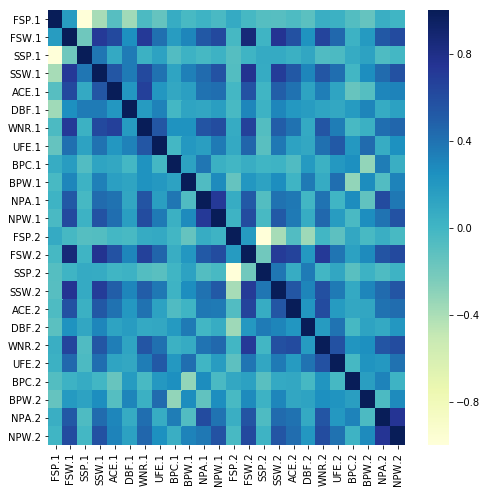

In [294]:
plt.figure(figsize=(8,8))
sns_heat = sns.heatmap(tennis_feat.corr(),cmap="YlGnBu")
plt.savefig("../results/Images/Heatplot.png")

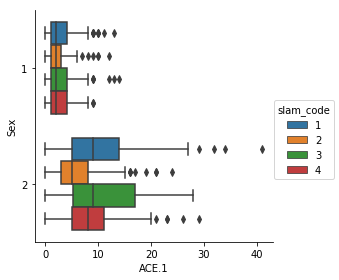

In [295]:
Aces_slam = sns.factorplot(x="ACE.1", y="Sex", hue="slam_code", data=tennis_feat, kind="box")
plt.savefig("../results/Images/Aces.png")

> We notice that the number of ACES is the least for French Open which is in line with what we expected

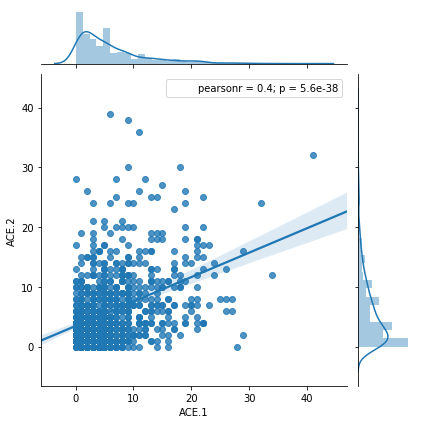

In [296]:
Aces_dist = sns.jointplot("ACE.1", "ACE.2", tennis_feat, kind="reg")
plt.savefig("../results/Images/Aces_dist.png")

> We notice that the ACEs served follow almost a Poisson like distribution

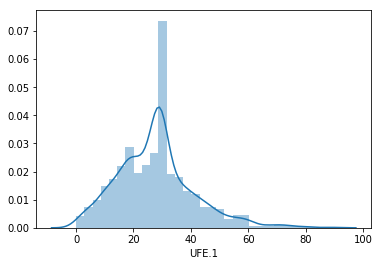

In [297]:
sns.distplot(tennis_feat['UFE.1'])
plt.savefig("../results/Images/Unforced.png")

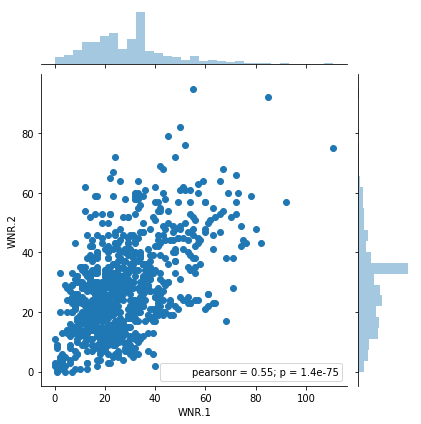

In [298]:
sns.jointplot(tennis_feat['WNR.1'],tennis_feat['WNR.2'])
plt.savefig("../results/Images/Winners_comp.png")

In [299]:
df_desc = tennis_feat.select_dtypes(include = [np.number]).describe()

In [300]:
df_desc.to_csv('../results/Numeric_desription.csv')

# ANALYSIS

#### Feature scaling

In [301]:
def scale_matrix(matrix,num_feat,non_num_feat):
    scl = StandardScaler()
    scl_mat = scl.fit_transform(matrix[num_feat])
    temp = np.concatenate((scl_mat,
                    matrix[non_num_feat].as_matrix().astype('int')),
                   axis = 1)
#     temp = temp.astype(int)
    return temp

In [302]:
#numeric columns
numeric_features = tennis_feat.select_dtypes(include=[np.number]).columns

#non-numeric columns
non_num_features = tennis_feat.select_dtypes(exclude=[np.number]).columns

In [303]:
Features = list(numeric_features)+(list(non_num_features))

In [304]:
print(Features)

['FSP.1', 'FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1', 'UFE.1', 'BPC.1', 'BPW.1', 'NPA.1', 'NPW.1', 'FSP.2', 'FSW.2', 'SSP.2', 'SSW.2', 'ACE.2', 'DBF.2', 'WNR.2', 'UFE.2', 'BPC.2', 'BPW.2', 'NPA.2', 'NPW.2', 'Round', 'Result', 'slam_code', 'Sex']


In [305]:
tennis_scaled = pd.DataFrame(scale_matrix(tennis_feat,numeric_features,non_num_features))

In [306]:
tennis_scaled.columns = Features

In [307]:
col_names = ['Round','slam_code','Sex','Result']
for col in col_names:
    tennis_scaled[col] = tennis_scaled[col].astype('category',copy=False)

#### Create dummy variables

In [308]:
tennis_dummy = pd.get_dummies(tennis_scaled)

In [309]:
tennis_dummy.columns

Index(['FSP.1', 'FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1', 'UFE.1',
       'BPC.1', 'BPW.1', 'NPA.1', 'NPW.1', 'FSP.2', 'FSW.2', 'SSP.2', 'SSW.2',
       'ACE.2', 'DBF.2', 'WNR.2', 'UFE.2', 'BPC.2', 'BPW.2', 'NPA.2', 'NPW.2',
       'Round_1.0', 'Round_2.0', 'Round_3.0', 'Round_4.0', 'Round_5.0',
       'Round_6.0', 'Round_7.0', 'Result_0.0', 'Result_1.0', 'slam_code_1.0',
       'slam_code_2.0', 'slam_code_3.0', 'slam_code_4.0', 'Sex_1.0',
       'Sex_2.0'],
      dtype='object')

In [310]:
tennis_dummy['Result_0.0'].sum()

473

In [311]:
rem_cols_dummy = ['Result_0.0','Sex_2.0','slam_code_1.0','slam_code_2.0',
                  'slam_code_3.0','slam_code_4.0']

tennis_final = tennis_dummy.drop(rem_cols_dummy,axis  = 1,inplace = False) 

In [312]:
tennis_final.columns

Index(['FSP.1', 'FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1', 'UFE.1',
       'BPC.1', 'BPW.1', 'NPA.1', 'NPW.1', 'FSP.2', 'FSW.2', 'SSP.2', 'SSW.2',
       'ACE.2', 'DBF.2', 'WNR.2', 'UFE.2', 'BPC.2', 'BPW.2', 'NPA.2', 'NPW.2',
       'Round_1.0', 'Round_2.0', 'Round_3.0', 'Round_4.0', 'Round_5.0',
       'Round_6.0', 'Round_7.0', 'Result_1.0', 'Sex_1.0'],
      dtype='object')

### Split data

In [313]:
#Train-test split. 30% for test
train_valid,test = train_test_split(tennis_final,test_size = 0.3,random_state=12345)
train,valid = train_test_split(train_valid,test_size = 0.3,random_state=12345)

In [314]:
Xtrain = train.iloc[:, train.columns != "Result_1.0"]
ytrain = train.iloc[:, train.columns == "Result_1.0"]

Xvalid = valid.iloc[:, valid.columns != "Result_1.0"]
yvalid = valid.iloc[:, valid.columns == "Result_1.0"]

Xtest = test.iloc[:, test.columns != "Result_1.0"]
ytest = test.iloc[:, test.columns == "Result_1.0"]

In [315]:
Xtrain.columns

Index(['FSP.1', 'FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1', 'UFE.1',
       'BPC.1', 'BPW.1', 'NPA.1', 'NPW.1', 'FSP.2', 'FSW.2', 'SSP.2', 'SSW.2',
       'ACE.2', 'DBF.2', 'WNR.2', 'UFE.2', 'BPC.2', 'BPW.2', 'NPA.2', 'NPW.2',
       'Round_1.0', 'Round_2.0', 'Round_3.0', 'Round_4.0', 'Round_5.0',
       'Round_6.0', 'Round_7.0', 'Sex_1.0'],
      dtype='object')

In [316]:
Xtrain = Xtrain.as_matrix()
Xvalid = Xvalid.as_matrix()
Xtest = Xtest.as_matrix()
ytrain = np.ravel(ytrain.as_matrix())
yvalid = np.ravel(yvalid.as_matrix())
ytest = np.ravel(ytest.as_matrix())

In [317]:
XCross = np.concatenate((Xtrain,Xvalid))
yCross = np.concatenate((ytrain,yvalid))

## Knn

In [318]:
knn=neighbors.KNeighborsClassifier()

In [319]:
parameters = {
        'n_neighbors': np.arange(1,25)
    }
clf = GridSearchCV(knn, parameters, cv=5)
clf.fit(XCross,yCross)
print ('gs.best_score_:', clf.best_score_)
print('Param value',clf.best_params_)

gs.best_score_: 0.8773006134969326
Param value {'n_neighbors': 23}


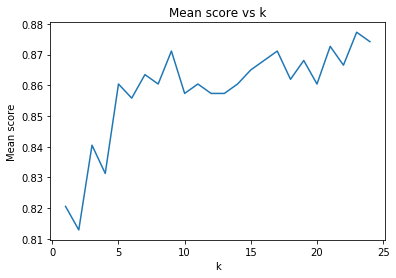

In [320]:
scores = [x[1] for x in clf.grid_scores_]
scores = np.array(scores).reshape(len(np.arange(1,25)))
scores

plt.plot(np.arange(1,25), scores)
plt.legend()
plt.xlabel('k')
plt.ylabel('Mean score')
plt.title('Mean score vs k')
plt.savefig('../results/Images/knn_score.png')

In [321]:
knn=neighbors.KNeighborsClassifier(n_neighbors=23)
knn.fit(Xtrain,ytrain)
print ('Train score:', knn.score(Xtrain,ytrain))
print ('Validation score:', knn.score(Xvalid,yvalid))
print ('Test score:', knn.score(Xtest,ytest))
# print('Param value',gs.best_params_)

Train score: 0.883771929825
Validation score: 0.857142857143
Test score: 0.857142857143


## Random forest classifer

In [322]:
rnf = RandomForestClassifier()
rnf.fit(Xtrain, ytrain)
print("Train score",rnf.score(Xtrain,ytrain))
print("Validation score",rnf.score(Xvalid,yvalid))
print("Test score",rnf.score(Xtest,ytest))

Train score 0.984649122807
Validation score 0.872448979592
Test score 0.842857142857


## Logistic with penalty

In [323]:
grid = {
        'C': np.power(10.0, np.arange(-6, 6))
    }
clf = LogisticRegression(penalty='l2', random_state=1234)
gs = GridSearchCV(clf, grid,cv=20)
gs.fit(XCross, yCross)

print ('gs.best_score_:', gs.best_score_)
print('Param value',gs.best_params_)
gs.grid_scores_

gs.best_score_: 0.941717791411043
Param value {'C': 0.10000000000000001}


[mean: 0.89110, std: 0.05540, params: {'C': 9.9999999999999995e-07},
 mean: 0.89264, std: 0.05537, params: {'C': 1.0000000000000001e-05},
 mean: 0.89264, std: 0.05537, params: {'C': 0.0001},
 mean: 0.90337, std: 0.04674, params: {'C': 0.001},
 mean: 0.93252, std: 0.04725, params: {'C': 0.01},
 mean: 0.94172, std: 0.03766, params: {'C': 0.10000000000000001},
 mean: 0.93865, std: 0.04063, params: {'C': 1.0},
 mean: 0.93405, std: 0.03854, params: {'C': 10.0},
 mean: 0.93405, std: 0.03959, params: {'C': 100.0},
 mean: 0.93405, std: 0.03959, params: {'C': 1000.0},
 mean: 0.93405, std: 0.03959, params: {'C': 10000.0},
 mean: 0.93405, std: 0.03959, params: {'C': 100000.0}]

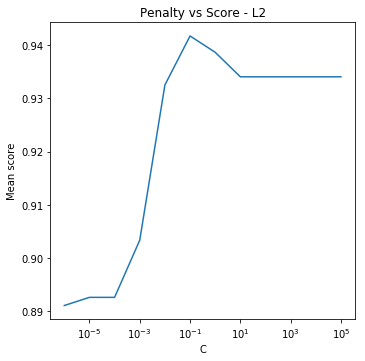

In [324]:
scores = [x[1] for x in gs.grid_scores_]
scores = np.array(scores).reshape(len(np.power(10.0, np.arange(-6, 6))))

plt.figure(figsize = (12,12))
ax = plt.subplot(224)
plt.plot(np.power(10.0, np.arange(-6, 6)), scores)
plt.legend()
plt.xlabel('C')
plt.ylabel('Mean score')
ax.set_xscale("log", nonposx='clip')
plt.title('Penalty vs Score - L2')
plt.savefig('../results/Images/Log_L2_score.png')

In [325]:
grid = {
        'C': np.power(10.0, np.arange(-6, 6))
    }
clf = LogisticRegression(penalty='l1', random_state=1234)
gs = GridSearchCV(clf, grid, cv=20)
gs.fit(XCross, yCross)

print ('gs.best_score_:', gs.best_score_)
print('Param value',gs.best_params_)
gs.grid_scores_

gs.best_score_: 0.9371165644171779
Param value {'C': 10.0}


[mean: 0.50000, std: 0.00000, params: {'C': 9.9999999999999995e-07},
 mean: 0.50000, std: 0.00000, params: {'C': 1.0000000000000001e-05},
 mean: 0.50000, std: 0.00000, params: {'C': 0.0001},
 mean: 0.50000, std: 0.00000, params: {'C': 0.001},
 mean: 0.89110, std: 0.04803, params: {'C': 0.01},
 mean: 0.93098, std: 0.04172, params: {'C': 0.10000000000000001},
 mean: 0.93405, std: 0.03601, params: {'C': 1.0},
 mean: 0.93712, std: 0.03996, params: {'C': 10.0},
 mean: 0.93405, std: 0.03959, params: {'C': 100.0},
 mean: 0.93405, std: 0.03959, params: {'C': 1000.0},
 mean: 0.93405, std: 0.03959, params: {'C': 10000.0},
 mean: 0.93405, std: 0.03959, params: {'C': 100000.0}]

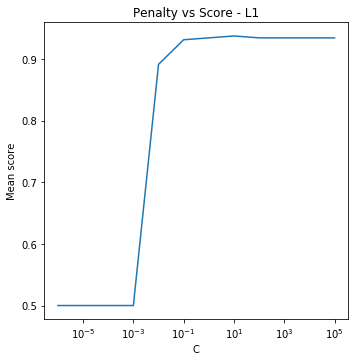

In [326]:
scores = [x[1] for x in gs.grid_scores_]
scores = np.array(scores).reshape(len(np.power(10.0, np.arange(-6, 6))))

plt.figure(figsize = (12,12))
ax = plt.subplot(224)
plt.plot(np.power(10.0, np.arange(-6, 6)), scores)
plt.legend()
plt.xlabel('C')
plt.ylabel('Mean score')
ax.set_xscale("log", nonposx='clip')
plt.title('Penalty vs Score - L1')
plt.savefig('../results/Images/Log_L1_score.png')

In [327]:
from sklearn.grid_search import GridSearchCV
grid = {
        'C': np.power(10.0, np.arange(0, 3))
    }
clf = LogisticRegression(penalty='l2', random_state=1234)
gs = GridSearchCV(clf, grid,cv=20)
gs.fit(XCross, yCross)

print ('gs.best_score_:', gs.best_score_)
print('Param value',gs.best_params_)
gs.grid_scores_

gs.best_score_: 0.9386503067484663
Param value {'C': 1.0}


[mean: 0.93865, std: 0.04063, params: {'C': 1.0},
 mean: 0.93405, std: 0.03854, params: {'C': 10.0},
 mean: 0.93405, std: 0.03959, params: {'C': 100.0}]

In [328]:
grid = {
        'C': np.power(10.0, np.arange(-2, 1))
    }
clf = LogisticRegression(penalty='l1', random_state=1234)
gs = GridSearchCV(clf, grid, cv=20)
gs.fit(XCross, yCross)

print ('gs.best_score_:', gs.best_score_)
print('Param value',gs.best_params_)
gs.grid_scores_

gs.best_score_: 0.9340490797546013
Param value {'C': 1.0}


[mean: 0.89110, std: 0.04803, params: {'C': 0.01},
 mean: 0.93098, std: 0.04172, params: {'C': 0.10000000000000001},
 mean: 0.93405, std: 0.03601, params: {'C': 1.0}]

In [329]:
lg = LogisticRegression(penalty = 'l1',C=1)
lg.fit(Xtrain,ytrain)

print("Num Features: %d",lg.coef_)
print("Selected Features: %s",lg.intercept_)
print('Actual number of iterations for all classes: ', lg.n_iter_)

# Compute the training accuracy
print('Mean accuracy  of training data: {0:.2f}%'
      .format(100 * lg.score(Xtrain, ytrain)))
# # Compute the validation accuracy
print('Mean accuracy  of validation data: {0:.2f}'
      .format(100 * lg.score(Xvalid, yvalid)))
# # # Compute the test accuracy
print('Mean accuracy  of test data: {0:.2f}'
      .format(100 * lg.score(Xtest, ytest)))

Num Features: %d [[  0.00000000e+00   2.83932185e+00   0.00000000e+00   1.46446179e+00
    0.00000000e+00  -2.72803678e-01   7.13679373e-01  -4.80037991e-01
    1.56976621e+00   1.38082034e+00   4.70723697e-02   0.00000000e+00
   -2.15291875e-02  -3.94022970e+00   4.67016912e-04  -1.32416464e+00
    1.13907296e-01   3.46788019e-01  -2.98688346e-01   4.39016292e-01
   -1.39389856e+00  -9.30383490e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   3.76170362e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   8.63376232e-02]]
Selected Features: %s [ 0.]
Actual number of iterations for all classes:  [18]
Mean accuracy  of training data: 95.39%
Mean accuracy  of validation data: 93.88
Mean accuracy  of test data: 91.07


In [330]:
train.iloc[:, train.columns != "Result_1.0"].columns

Index(['FSP.1', 'FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1', 'UFE.1',
       'BPC.1', 'BPW.1', 'NPA.1', 'NPW.1', 'FSP.2', 'FSW.2', 'SSP.2', 'SSW.2',
       'ACE.2', 'DBF.2', 'WNR.2', 'UFE.2', 'BPC.2', 'BPW.2', 'NPA.2', 'NPW.2',
       'Round_1.0', 'Round_2.0', 'Round_3.0', 'Round_4.0', 'Round_5.0',
       'Round_6.0', 'Round_7.0', 'Sex_1.0'],
      dtype='object')

In [331]:
col_list = list(train.iloc[:, train.columns != "Result_1.0"].columns)

In [332]:
coef = np.ravel(lg.coef_).tolist()

In [333]:
a = list(zip(col_list,coef))

In [334]:
#https://stackoverflow.com/a/7142240S
a.sort(key = lambda t: t[1],reverse=True)

### Feature importance

In [335]:
a

[('FSW.1', 2.839321851665106),
 ('BPC.1', 1.569766209854888),
 ('SSW.1', 1.4644617900185504),
 ('BPW.1', 1.3808203371498293),
 ('WNR.1', 0.7136793733090935),
 ('UFE.2', 0.4390162922948281),
 ('Round_2.0', 0.37617036186387803),
 ('DBF.2', 0.34678801865873243),
 ('ACE.2', 0.1139072955262136),
 ('Sex_1.0', 0.08633762316558109),
 ('NPA.1', 0.04707236966773735),
 ('SSP.2', 0.0004670169119315859),
 ('FSP.1', 0.0),
 ('SSP.1', 0.0),
 ('ACE.1', 0.0),
 ('NPW.1', 0.0),
 ('NPA.2', 0.0),
 ('NPW.2', 0.0),
 ('Round_1.0', 0.0),
 ('Round_3.0', 0.0),
 ('Round_4.0', 0.0),
 ('Round_5.0', 0.0),
 ('Round_6.0', 0.0),
 ('Round_7.0', 0.0),
 ('FSP.2', -0.021529187470975802),
 ('DBF.1', -0.2728036780874566),
 ('WNR.2', -0.29868834638279596),
 ('UFE.1', -0.48003799058174973),
 ('BPW.2', -0.930383489532838),
 ('SSW.2', -1.3241646404141254),
 ('BPC.2', -1.3938985632647451),
 ('FSW.2', -3.9402296954880747)]